In [1]:
!git clone https://github.com/laxmimerit/Image-Dataset-for-Age-Prediction.git

Cloning into 'Image-Dataset-for-Age-Prediction'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 47107 (delta 0), reused 2 (delta 0), pack-reused 47104
Receiving objects: 100% (47107/47107), 1.37 GiB | 79.68 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (24110/24110), done.


In [2]:
!pip install ktrain

     |████████████████████████████████| 25.2 MB 2.4 MB/s eta 0:00:01
     |██████████████████████▎         | 293.4 MB 113.4 MB/s eta 0:00:02

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 421.6 MB 115.2 MB/s eta 0:00:01     |████████████████████████████████| 421.8 MB 6.7 kB/s s eta 0:00:01
     |████████████████████████████████| 6.7 MB 64.0 MB/s eta 0:00:01
     |████████████████████████████████| 981 kB 69.5 MB/s eta 0:00:01
     |████████████████████████████████| 19.2 MB 60.9 MB/s eta 0:00:01
     |████████████████████████████████| 241 kB 80.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 70.7 MB/s eta 0:00:01
     |████████████████████████████████| 660 kB 65.4 MB/s eta 0:00:01
     |████████████████████████████████| 468 kB 69.4 MB/s eta 0:00:01
     |████████████████████████████████| 448 kB 67.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 69.4 MB/s eta 0:00:01
     |████████████████████████████████| 883 kB 68.9 MB/s eta 0:00:01
     |████████████████████████████████| 5.6 MB 67.5 MB/s eta 0:00:01
  Created wheel for ktrain: filename=ktrain-0.15.3-py3-none-any.whl size=25243893 sha256=b6e4143b

In [15]:
%matplotlib inline
import os
import ktrain
from ktrain import vision as vis

In [4]:
#image is as 100_0_0_ge (100 is the age) and another image name is 10_0_0_20170111the age)
#So we are pulling age from image name as the image name consists of age_male/female(0/1)_ethenicity_yeardatetimeof photo

In [8]:
import re
pattern = r'([^/]+)_\d+_\d+_\d+.jpg$'
p = re.compile(pattern)
#checking for one image
r = p.search('10_0_0_20170110220546177.jpg')
print(r.group(1))

10


In [13]:
#to know the current directory where the images are located we have checked
pwd

'/home/roshanbtech/Deep_Learning/Age_Detection'

In [14]:
DATADIR = '/home/roshanbtech/Deep_Learning/Age_Detection/Image-Dataset-for-Age-Prediction/images'

In [17]:
# it is a regression problem so we have seleted its true
#here data is going to divide into three vriables (train,validation(test),preprocessor)
(train_data,test_data,preproc) = vis.images_from_fname(DATADIR,pattern = pattern,
                                                       is_regression=True, random_state = 42)

/opt/conda/lib/python3.7/site-packages/ktrain/vision/data.py:744: UserWarning: Could not extract target for /home/roshanbtech/Deep_Learning/Age_Detection/Image-Dataset-for-Age-Prediction/images/39_1_20170116174525125.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/opt/conda/lib/python3.7/site-packages/ktrain/vision/data.py:744: UserWarning: Could not extract target for /home/roshanbtech/Deep_Learning/Age_Detection/Image-Dataset-for-Age-Prediction/images/61_1_20170109142408075.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/opt/conda/lib/python3.7/site-packages/ktrain/vision/data.py:744: UserWarning: Could not extract target for /home/roshanbtech/Deep_Learning/Age_Detection/Image-Dataset-for-Age-Prediction/images/61_3_20170109150557335.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/opt/conda/lib/python3.7/

Found 21669 validated image filenames.
Found 2432 validated image filenames.


we can see that few images are not able to extract because of the file name is not in our specified order like - 53__0_20170116184028385.jpg /24_0_1_20170116220224657 .jpg

In [18]:
#Know lets check what all regressor / classifier(fo classification problem)  are available
vis.print_image_regression_models()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized)
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized)
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized)
wrn22: 22-layer Wide Residual Network (randomly initialized)
default_cnn: a default LeNet-like Convolutional Neural Network


In [19]:
#so we have above mentioned models , in this we are going to use pretrained_resnet50
model = vis.image_regression_model('pretrained_resnet50',train_data= train_data,
                                   val_data= test_data)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 4d473c1dd8becc155b73f8504c6f6626 so we will re-download the data.
94773248/94765736 [==============================] - 2s 0us/step
pretrained_resnet50 model created.


In [20]:
learner = ktrain.get_learner(model = model , train_data= train_data,val_data= test_data,
                               batch_size=64)

In [21]:
# we are taking learning rate as 10^-4 = 1e-4
# we can use lerner.fit or we can fit for onecycle to check and epocs is 2
learner.fit_onecycle(1e-4,2)



begin training using onecycle policy with max lr of 0.0001...
Train for 339 steps, validate for 76 steps
Epoch 1/2
339/339 [==============================] - 760s 2s/step - loss: 376.0925 - mae: 14.5482 - val_loss: 219.1791 - val_mae: 11.0968
Epoch 2/2
339/339 [==============================] - 761s 2s/step - loss: 168.3967 - mae: 9.9534 - val_loss: 200.4800 - val_mae: 10.7466


In [22]:
#know we are freezing first 15 layers of resnet and will run remaining 35 layers
learner.freeze(15)
learner.fit_onecycle(1e-4,2)



begin training using onecycle policy with max lr of 0.0001...
Train for 339 steps, validate for 76 steps
Epoch 1/2
339/339 [==============================] - 2260s 7s/step - loss: 106.5908 - mae: 7.7204 - val_loss: 211.8332 - val_mae: 10.7355
Epoch 2/2
339/339 [==============================] - 2236s 7s/step - loss: 41.8037 - mae: 4.8641 - val_loss: 92.4389 - val_mae: 6.6352


In [24]:
predictor = ktrain.get_predictor(learner.model,preproc)

In [25]:
#Trying to take some images from test_data to verify our model
test_data.filenames[15:20]

['8_1_0_20170109204935187.jpg',
 '52_0_0_20170111203528972.jpg',
 '30_1_2_20170116161303257.jpg',
 '66_0_3_20170119212007271.jpg',
 '27_0_0_20170117012806890.jpg']

In [30]:
#creating a function to test the images
def show_prediction(fname):
    fname = DATADIR +'/' + fname
    pred = round(predictor.predict_filename(fname)[0])
    actual = int(p.search(fname).group(1))
    vis.show_image(fname)
    print('Predicted Age : %s || Actual Age : %s ' %(pred,actual))

Predicted Age : 7.0 || Actual Age : 8 


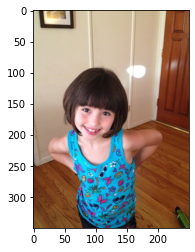

In [31]:
show_prediction('8_1_0_20170109204935187.jpg')

In [34]:
#creating a function to real images
def real_prediction(fname):
    
    pred = round(predictor.predict_filename(fname)[0])
    
    vis.show_image(fname)
    print('Predicted Age : %s ' %(pred))

Predicted Age : 4.0 


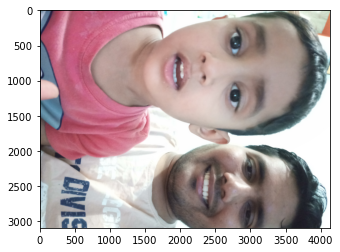

In [40]:
real_prediction('')

In [41]:
#Saving the model
# Saving Json file
model_json = learner.model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# Saving Weights
learner.model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
